Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,192 (852.31 KB)

 Trainable params: 218,192 (852.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1210 - val_loss: 0.0446
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0407 - val_loss: 0.0307
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0288 - val_loss: 0.0237
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0226 - val_loss: 0.0190
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0182 - val_loss: 0.0160
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0154 - val_loss: 0.0145
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0139 - val_loss: 0.0131
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0129 - val_loss: 0.0123
Epoch 9/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0118 - val_loss: 0.0115
Epoch 10/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0112 - val_loss: 0.0109
Epoch 11/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0106 - val_loss: 0.0103
Epoch 12/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0100 - val_lo

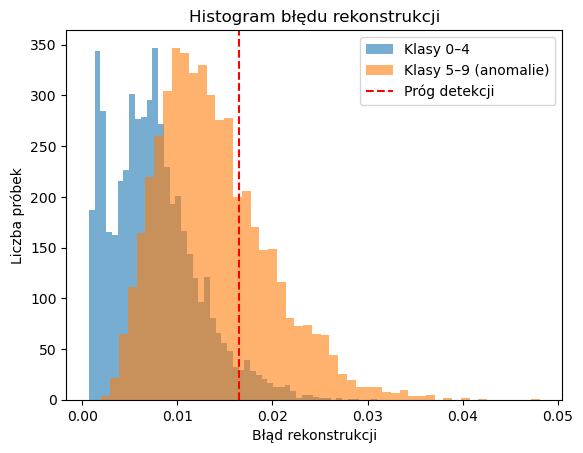

In [ ]:
# 1. Importowanie bibliotek
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# 2. Załaduj dane MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# 3. Filtruj tylko klasy 0–4 do treningu
train_mask = y_train <= 4
x_train_filtered = x_train[train_mask]

# 4. Budowa autoenkodera
input_dim = 784
encoding_dim = 64

input_img = tf.keras.Input(shape=(input_dim,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

decoded = layers.Dense(128, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

# 5. Trening autoenkodera
autoencoder.fit(x_train_filtered, x_train_filtered,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_split=0.2)

# 6. Ewaluacja na pełnym zbiorze testowym (klasy 0–9)
reconstructions = autoencoder.predict(x_test)
reconstruction_errors = np.mean(np.square(x_test - reconstructions), axis=1)

# 7. Ustal próg detekcji na podstawie klas 0–4
test_mask_0_4 = y_test <= 4
threshold = np.mean(reconstruction_errors[test_mask_0_4]) + 2 * np.std(reconstruction_errors[test_mask_0_4])

# 8. Wykrywanie anomalii
y_pred_anomaly = reconstruction_errors > threshold
y_true_anomaly = y_test > 4  # klasy 5–9 to anomalie

# 9. Ocena skuteczności
from sklearn.metrics import classification_report, confusion_matrix

print("Raport klasyfikacji (anomalia = 1):")
print(classification_report(y_true_anomaly, y_pred_anomaly))
print("Macierz pomyłek:")
print(confusion_matrix(y_true_anomaly, y_pred_anomaly))

# 10. Przykładowe błędy rekonstrukcji
plt.hist(reconstruction_errors[test_mask_0_4], bins=50, alpha=0.6, label='Klasy 0–4')
plt.hist(reconstruction_errors[~test_mask_0_4], bins=50, alpha=0.6, label='Klasy 5–9 (anomalie)')
plt.axvline(threshold, color='red', linestyle='--', label='Próg detekcji')
plt.xlabel("Błąd rekonstrukcji")
plt.ylabel("Liczba próbek")
plt.legend()
plt.title("Histogram błędu rekonstrukcji")
plt.show()



